Dataset Shape: (1025, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Data Types:
 {'age': dtype('int64'), 'sex': dtype('int64'), 'cp': dtype('int64'), 'trestbps': dtype('int64'), 'chol': dtype('int64'), 'fbs': dtype('int64'), 'restecg': dtype('int64'), 'thalach': dtype('int64'), 'exang': dtype('int64'), 'oldpeak': dtype('float64'), 'slope': dtype('int64'), 'ca': dtype('int64'), 'thal': dtype('int64'), 'target': dtype('int64')}

Missing Values:
 {'age': 0, 'sex': 0, 'cp': 0, 'trestbps': 0, 'chol': 0, 'fbs': 0, 'restecg': 0, 'thalach': 0, 'exang': 0, 'oldpeak': 0, 'slope': 0, 'ca': 0, 'thal': 0, 'target': 0}

Summary Statistics:
            count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0   

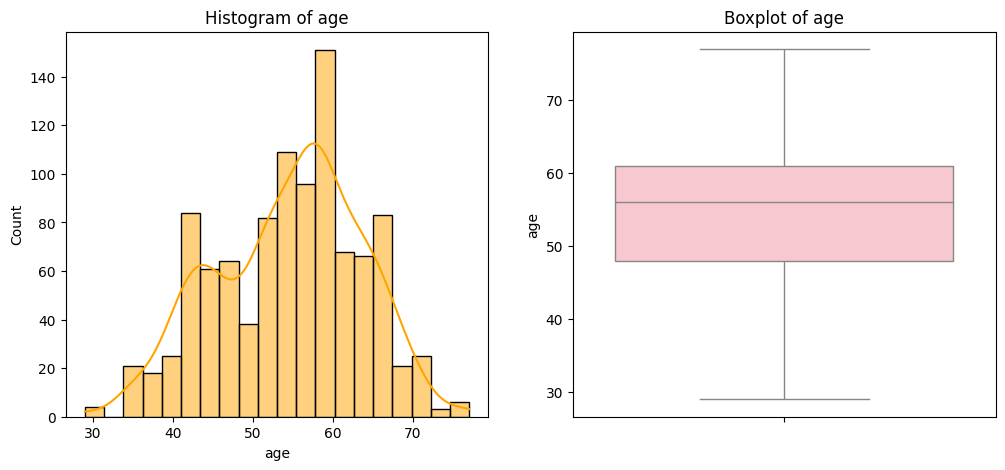

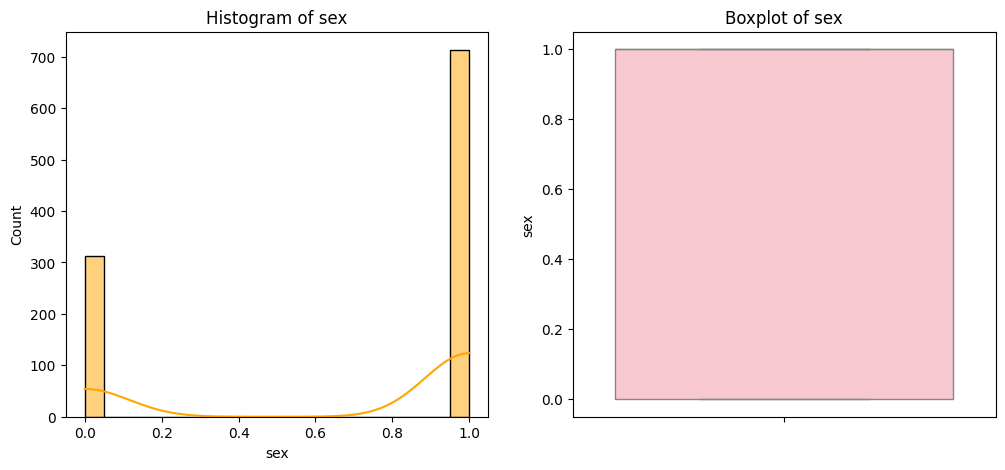

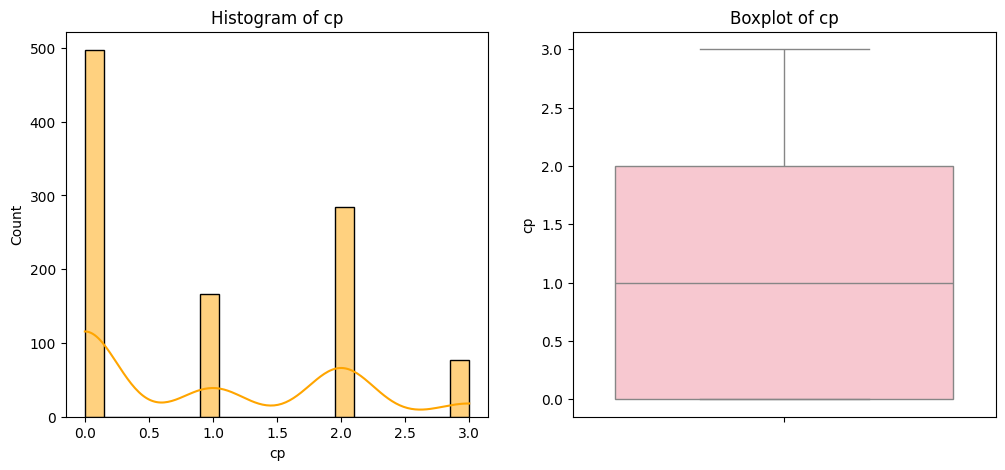

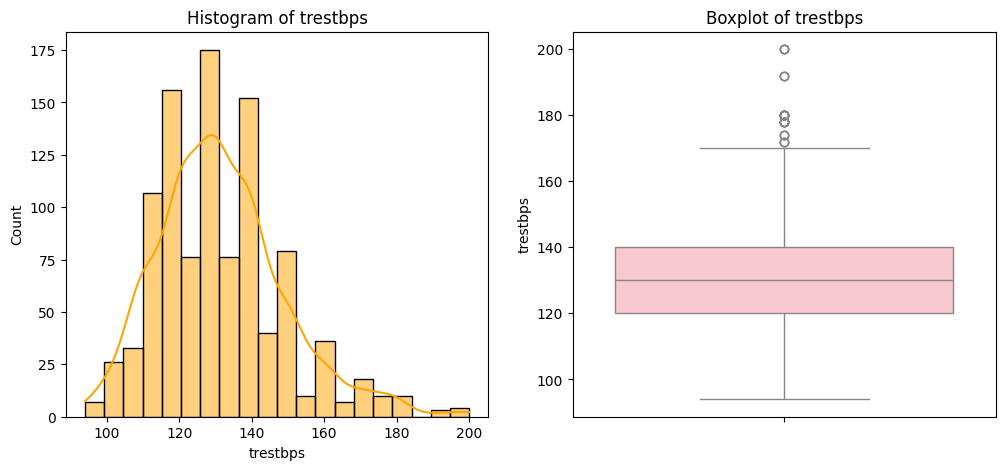

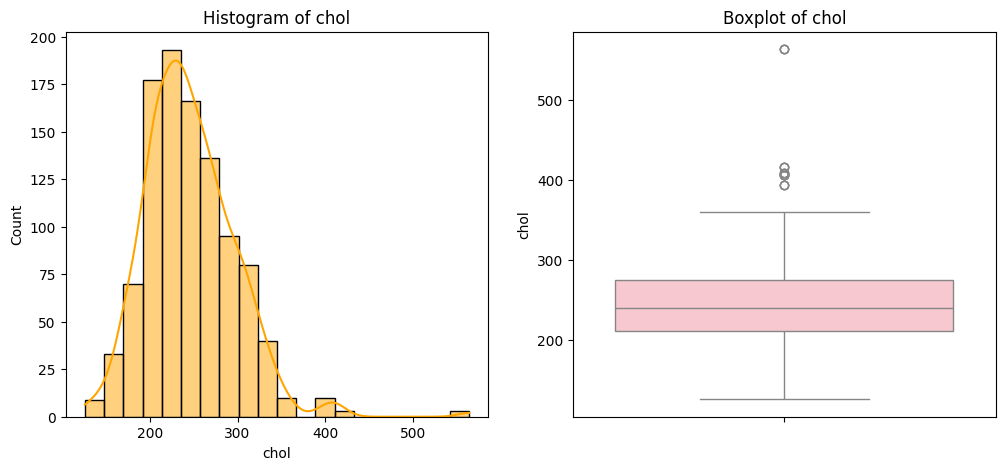

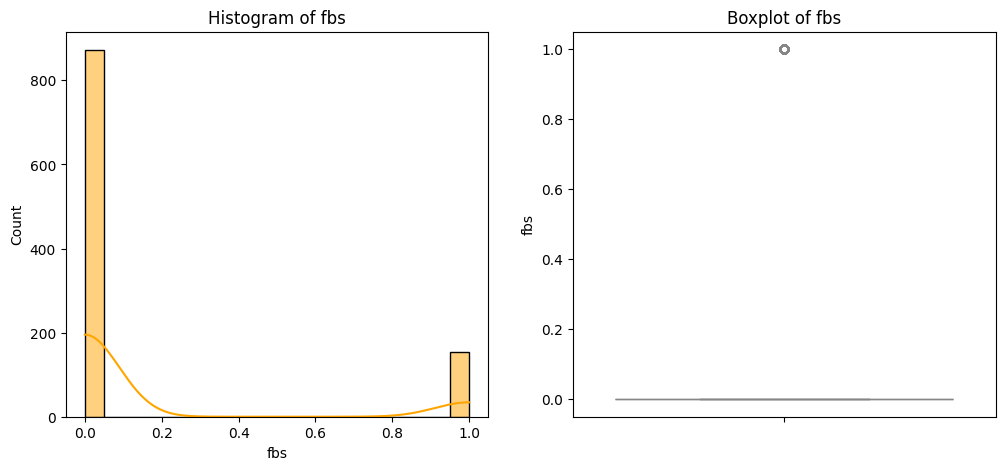

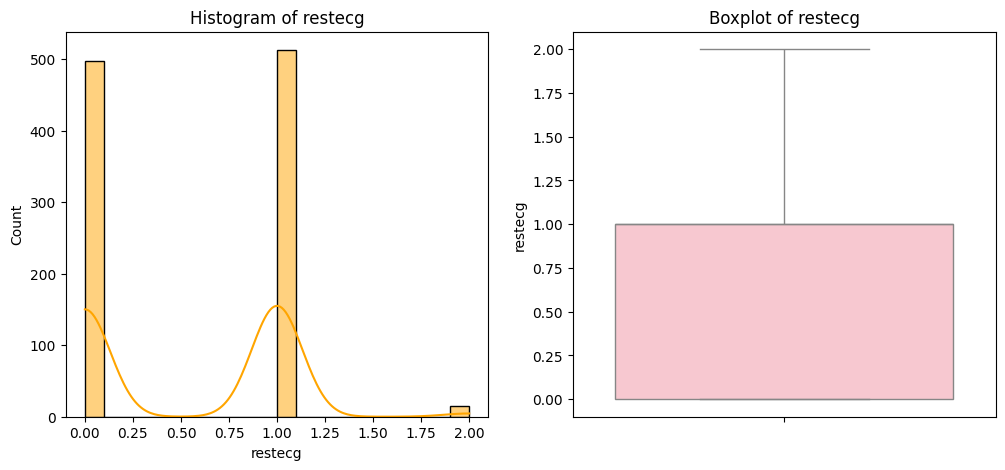

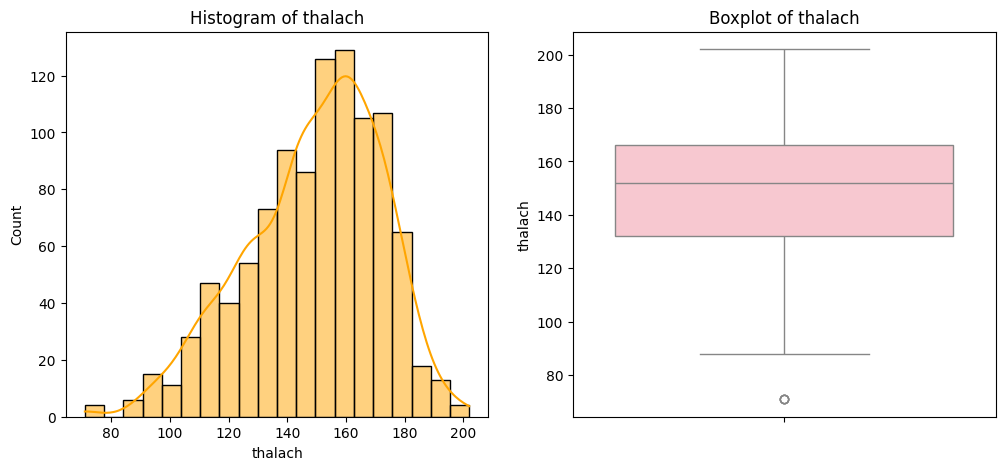

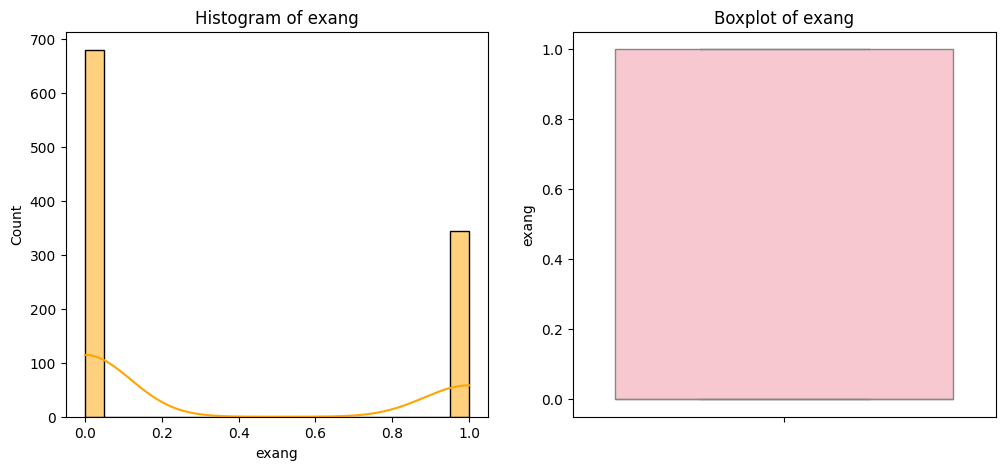

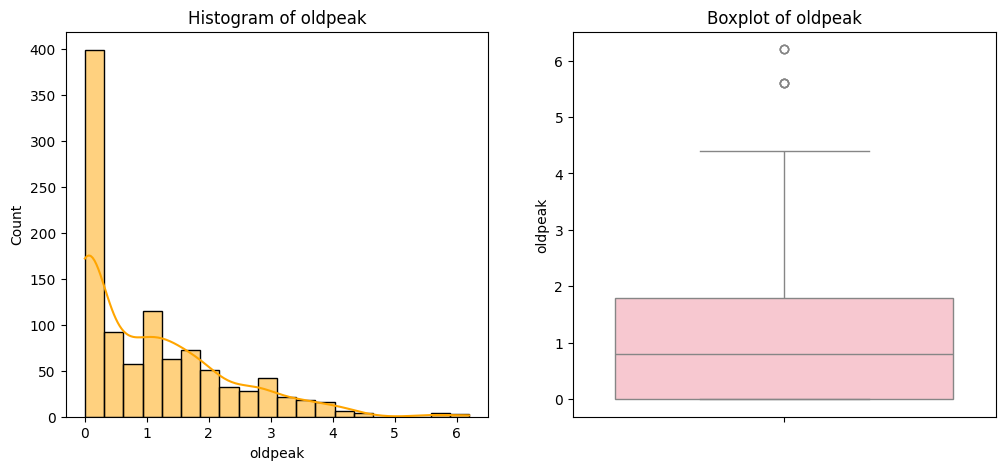

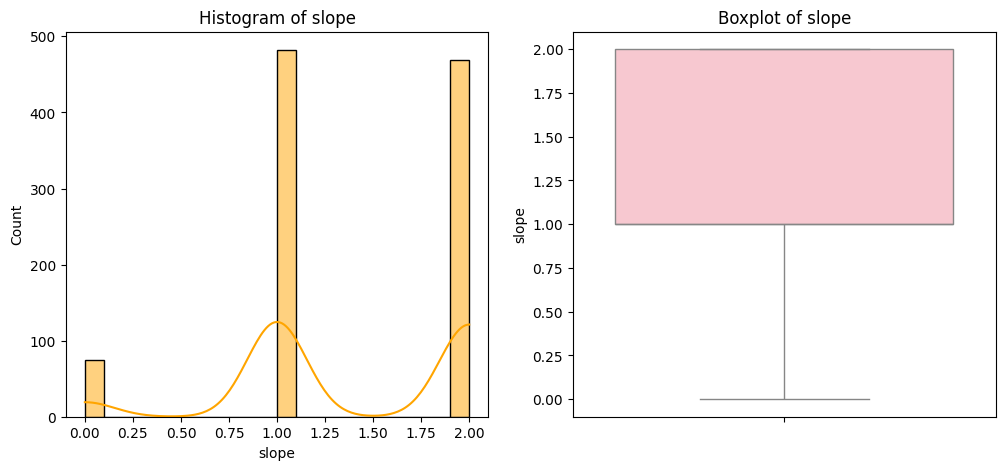

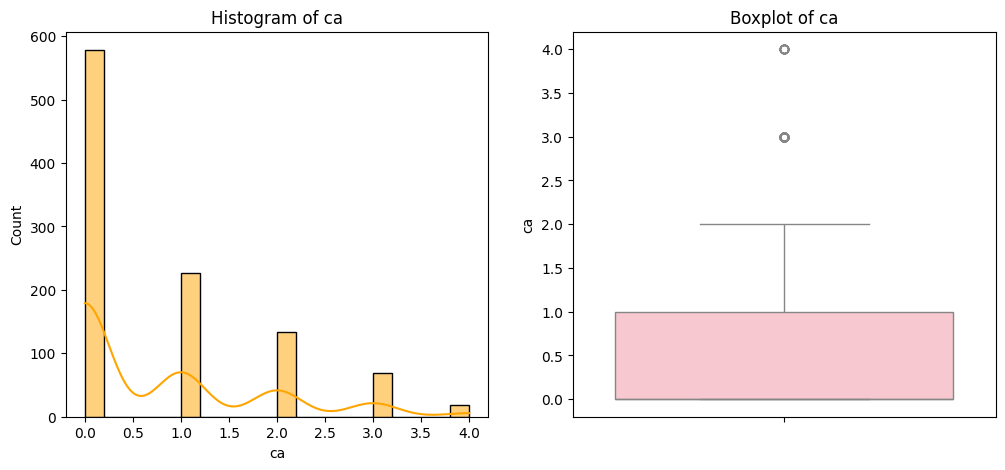

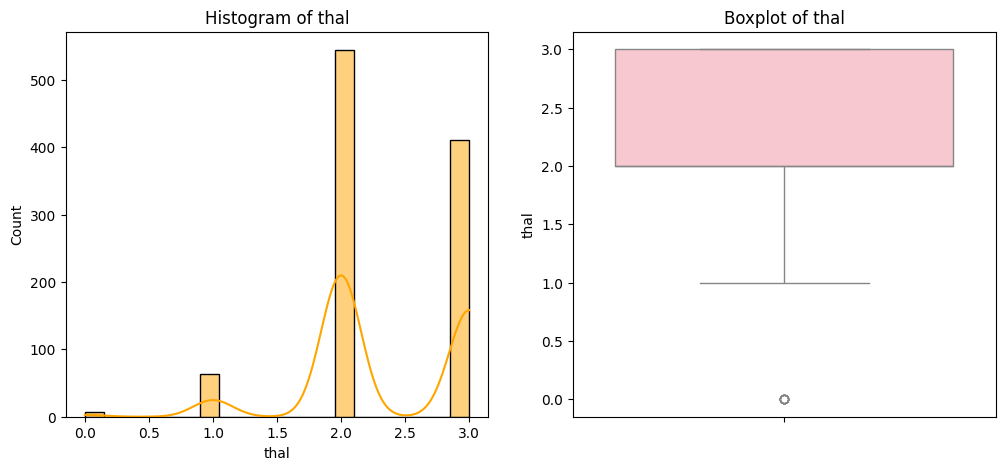

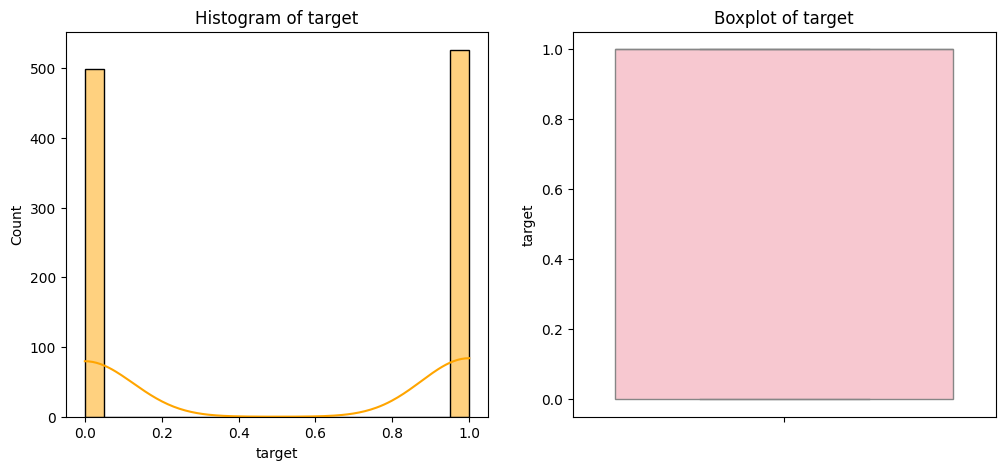

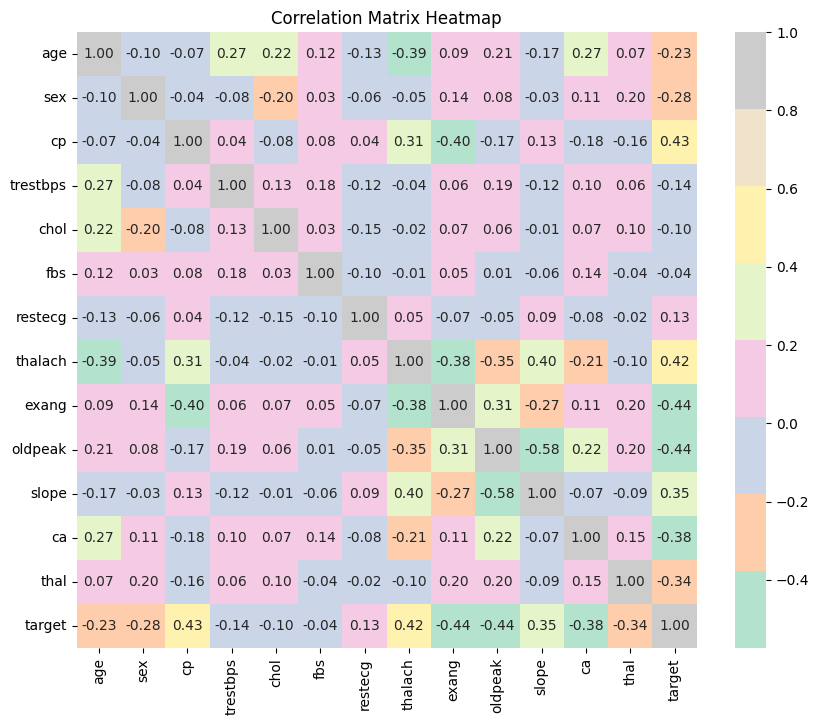


Feature Importance:
      Feature  Importance
2         cp    0.134201
7    thalach    0.120473
11        ca    0.116755
9    oldpeak    0.116151
12      thal    0.097043
0        age    0.089313
4       chol    0.078930
3   trestbps    0.074253
8      exang    0.059592
10     slope    0.048738
1        sex    0.036057
6    restecg    0.019619
5        fbs    0.008874


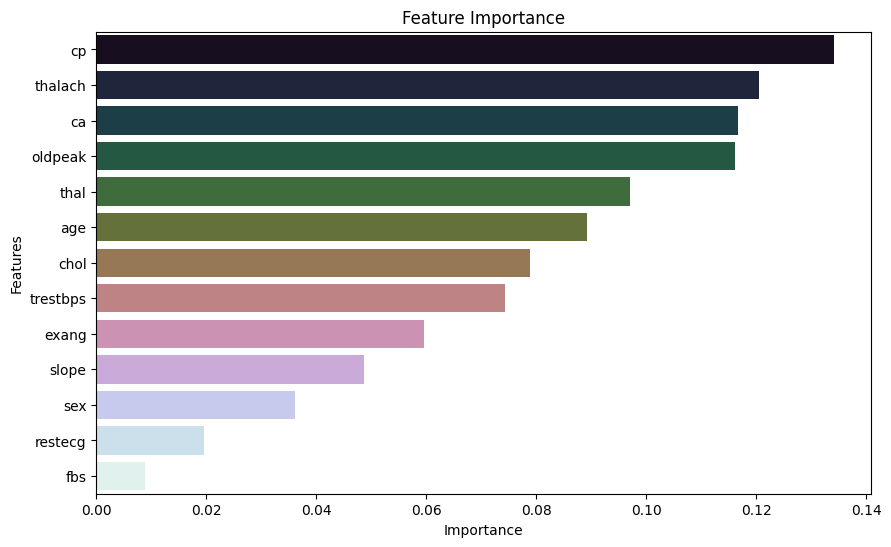

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Load the heart.csv dataset
heart_data = pd.read_csv('heart.csv')

# Dataset Exploration and Summary
dataset_summary = {
    "Shape": heart_data.shape,
    "Columns": heart_data.columns.tolist(),
    "Data Types": heart_data.dtypes.to_dict(),
    "Missing Values": heart_data.isnull().sum().to_dict(),
    "Summary Statistics": heart_data.describe().T
}

# Display Dataset Summary
print("Dataset Shape:", dataset_summary["Shape"])
print("Columns:", dataset_summary["Columns"])
print("\nData Types:\n", dataset_summary["Data Types"])
print("\nMissing Values:\n", dataset_summary["Missing Values"])
print("\nSummary Statistics:\n", dataset_summary["Summary Statistics"])

# Data Cleaning and Preprocessing
# One-Hot Encoding for categorical variables
categorical_columns = heart_data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = pd.DataFrame(encoder.fit_transform(heart_data[categorical_columns]), 
                            columns=encoder.get_feature_names_out(categorical_columns))

heart_data_cleaned = pd.concat([heart_data.drop(categorical_columns, axis=1), encoded_cats], axis=1)
heart_data_cleaned = heart_data_cleaned.fillna(heart_data_cleaned.mean())

# Data Visualizations: Histograms and Box Plots with custom colors
def visualize_distributions(data):
    for column in data.columns:
        if data[column].dtype in ['int64', 'float64']:
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            sns.histplot(data[column], kde=True, bins=20, color='orange')
            plt.title(f'Histogram of {column}')

            plt.subplot(1, 2, 2)
            sns.boxplot(data[column], color='pink') 
            plt.title(f'Boxplot of {column}')
            plt.show()

# Visualize Distributions
visualize_distributions(heart_data)

# Correlation Heatmap
correlation_matrix = heart_data.corr()

# Visualization: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Pastel2")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Feature Importance (using tree-based method)
target_column = 'target'  # Specify your target column
feature_columns = [col for col in heart_data.columns if col != target_column]

# Handle missing data and encode categorical variables if needed
heart_data_cleaned = heart_data.fillna(heart_data.mean())
X = heart_data_cleaned[feature_columns]
y = heart_data_cleaned[target_column]

# Train Random Forest for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract and display feature importance
feature_importance = pd.DataFrame({
    "Feature": feature_columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n", feature_importance)

# Display feature importance as a bar plot
plt.figure(figsize=(10, 6))

# Generate enough colors using sns.color_palette
colors = sns.color_palette("cubehelix", len(feature_importance))

# Use hue and set legend=False
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance,
    palette=colors,
    hue="Feature",
    dodge=False,
    legend=False
)

plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()




Logistic Regression Metrics:
Precision: 0.82
Recall: 0.88
F1-Score: 0.85
Accuracy: 0.82


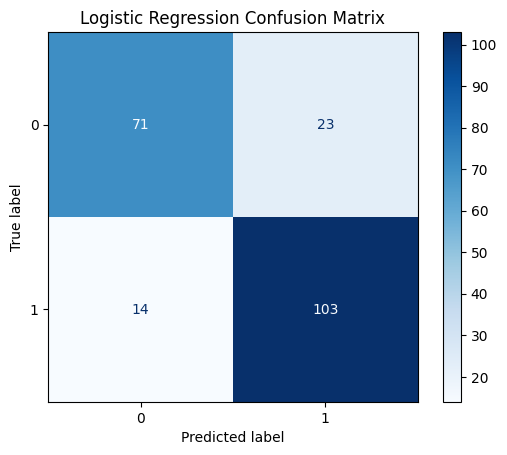

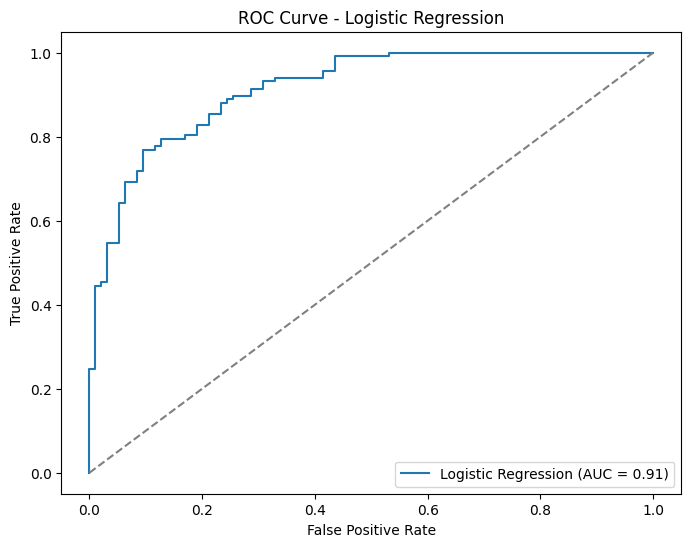


Support Vector Machine Metrics:
Precision: 0.90
Recall: 0.95
F1-Score: 0.93
Accuracy: 0.91


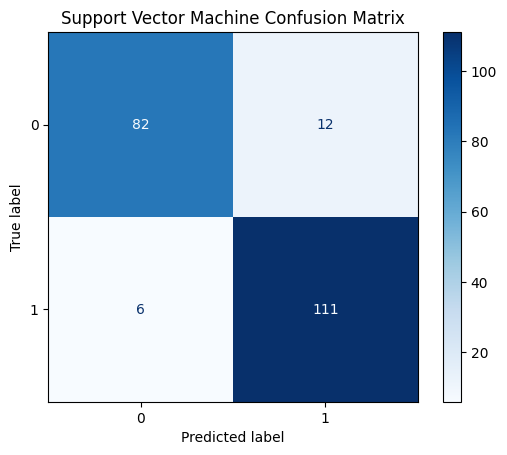

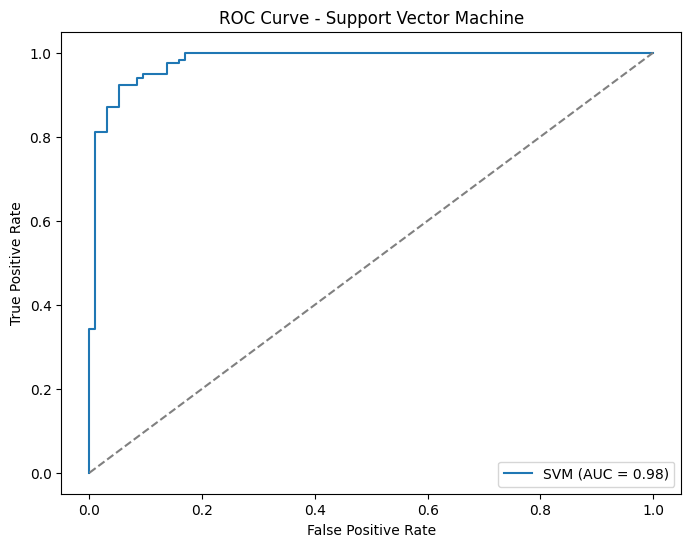


Multilayer Perceptron (MLP) Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Accuracy: 1.00


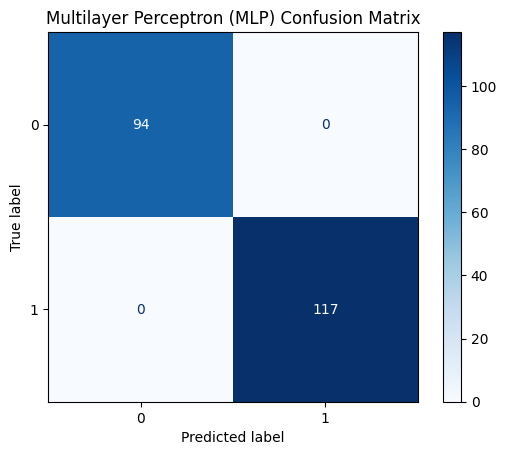

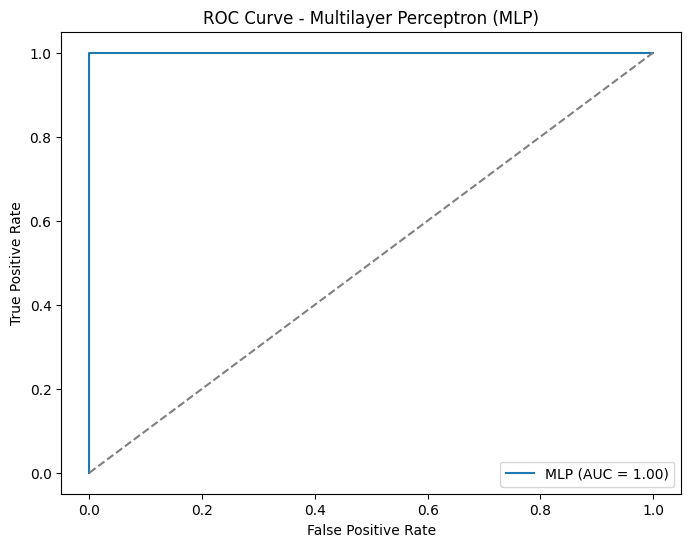

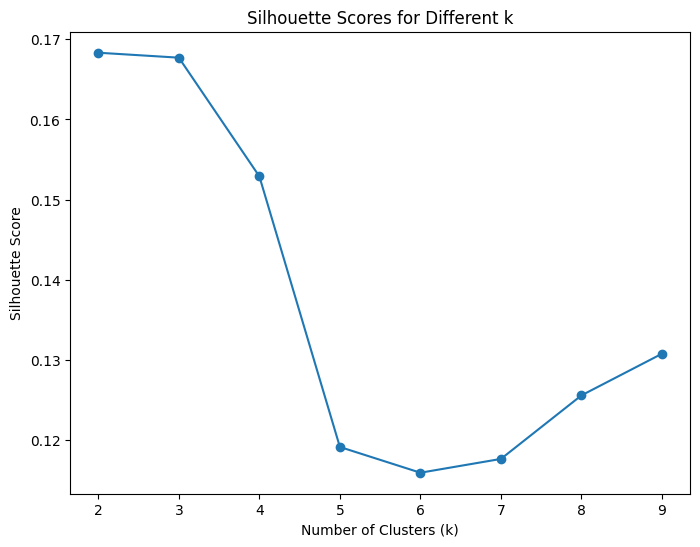

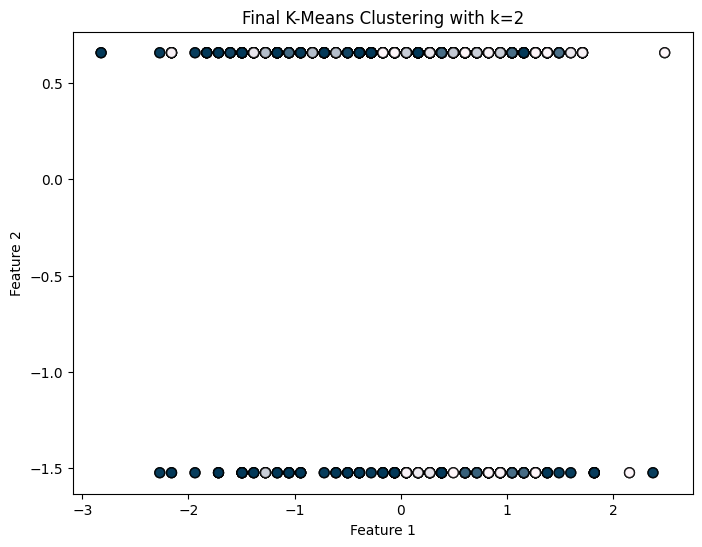

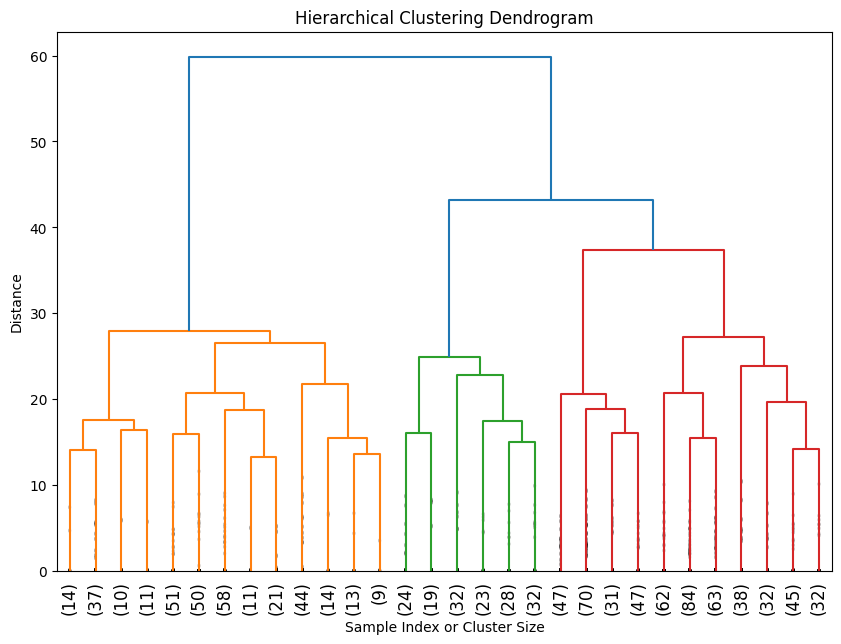

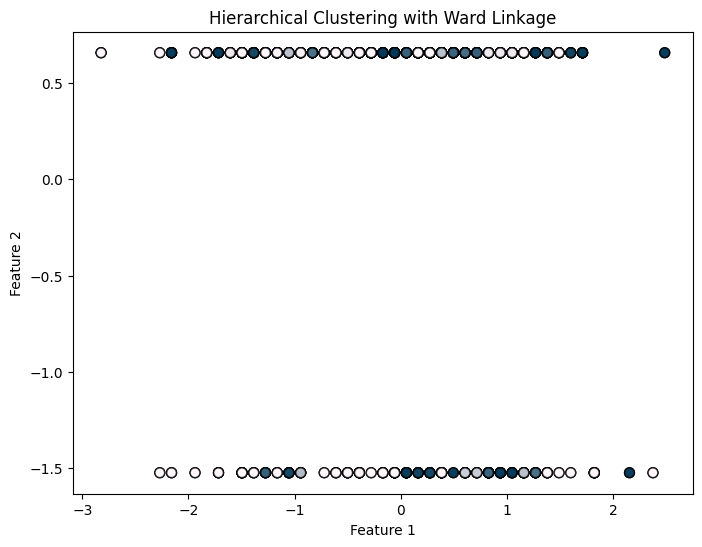

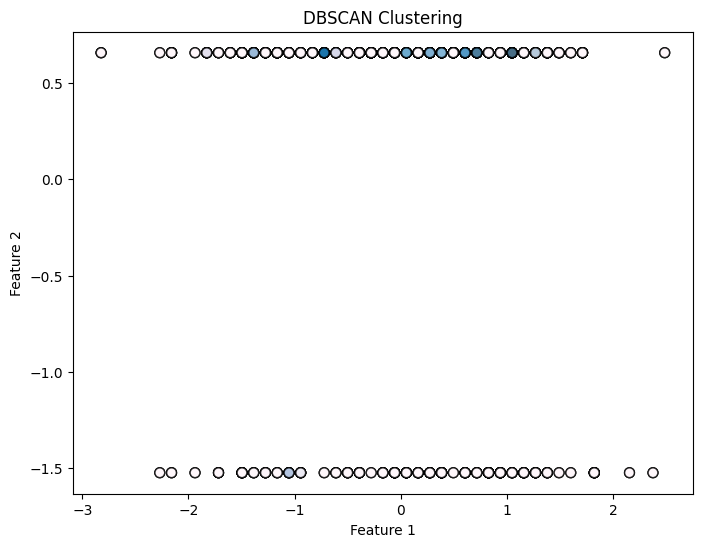

DBSCAN found 14 clusters and 974 outliers.

Gradient Boosting Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Accuracy: 1.00


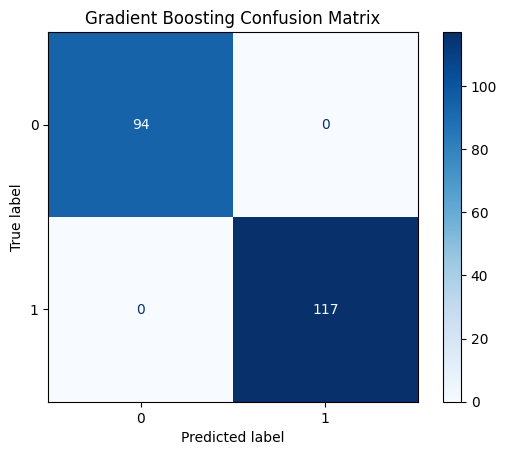

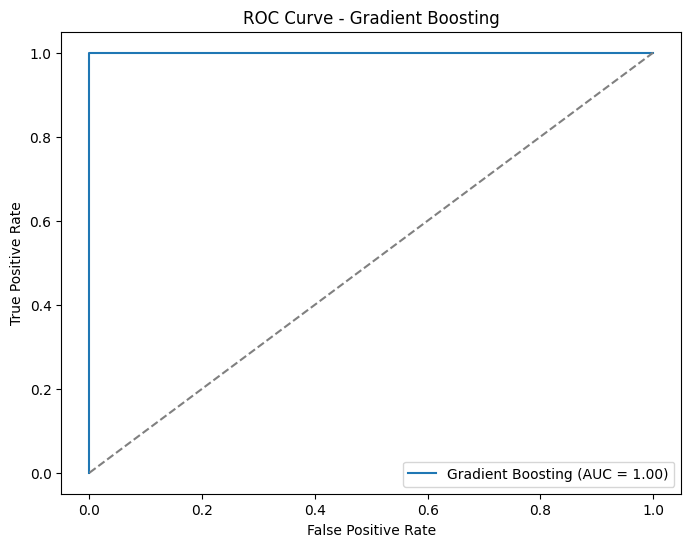

Gradient Boosting Cross-Validation Accuracy: 1.00 ± 0.01


/Users/alinaantonova/cs549/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alinaantonova/cs549/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alinaantonova/cs549/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Model Comparison (Cross-Validation Accuracy):
Logistic Regression: 0.85 ± 0.03
Support Vector Machine: 0.92 ± 0.03
Multilayer Perceptron: 0.99 ± 0.01
Gradient Boosting: 1.00 ± 0.01


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering, DBSCAN

# Load the heart.csv dataset
heart_data = pd.read_csv('heart.csv')

# Define features and target
X = heart_data_cleaned.drop('target', axis=1)
y = heart_data_cleaned['target']

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Helper function to evaluate models
def evaluate_model(model_name, y_test, predictions):
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)

    print(f"\n{model_name} Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Accuracy: {accuracy:.2f}")

    ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Train Logistic Regression with increased max_iter
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
evaluate_model("Logistic Regression", y_test, logistic_predictions)

# ROC Curve for Logistic Regression
logistic_probabilities = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, logistic_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Train Support Vector Machine
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
evaluate_model("Support Vector Machine", y_test, svm_predictions)

# ROC Curve for SVM
svm_probabilities = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, svm_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve - Support Vector Machine")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Train Multilayer Perceptron (MLP)
mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_test)
evaluate_model("Multilayer Perceptron (MLP)", y_test, mlp_predictions)

# ROC Curve for MLP
mlp_probabilities = mlp_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, mlp_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"MLP (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve - Multilayer Perceptron (MLP)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# K-Means Clustering
silhouette_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_resampled)
    silhouette_scores.append(silhouette_score(X_resampled, labels))

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Optimal k
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_resampled)

# Final Scatter plot of clusters using first two features
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=kmeans_labels, cmap='PuBu', s=50, alpha=0.7, edgecolor='k')
plt.title(f"Final K-Means Clustering with k={optimal_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Hierarchical Clustering
linked = linkage(X_resampled, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

# Agglomerative Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical_model.fit_predict(X_resampled)

# Scatter plot for Hierarchical Clustering using first two features
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=hierarchical_labels, cmap='PuBu', s=50, alpha=0.7, edgecolor='k')
plt.title("Hierarchical Clustering with Ward Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_resampled)

# Scatter plot for DBSCAN Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=dbscan_labels, cmap='PuBu', s=50, alpha=0.7, edgecolor='k')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Count unique labels (clusters and outliers)
unique_labels = set(dbscan_labels)
print(f"DBSCAN found {len(unique_labels) - (1 if -1 in unique_labels else 0)} clusters and {sum(dbscan_labels == -1)} outliers.")

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
evaluate_model("Gradient Boosting", y_test, gb_predictions)

# ROC Curve for Gradient Boosting
gb_probabilities = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, gb_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve - Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Cross-validation for Gradient Boosting
cv_scores = cross_val_score(gb_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Gradient Boosting Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Model Comparison
models = {
    "Logistic Regression": logistic_model,
    "Support Vector Machine": svm_model,
    "Multilayer Perceptron": mlp_model,
    "Gradient Boosting": gb_model
}

comparison_scores = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    comparison_scores[name] = (cv_scores.mean(), cv_scores.std())

print("\nModel Comparison (Cross-Validation Accuracy):")
for model_name, (mean_score, std_score) in comparison_scores.items():
    print(f"{model_name}: {mean_score:.2f} ± {std_score:.2f}")